### Image Inpainting
예제코드 : https://towardsdatascience.com/remove-text-from-images-using-cv2-and-keras-ocr-24e7612ae4f4


In [ ]:
!pip install keras_ocr

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import math
import numpy as np
import cv2

def display(img, color='rgb', original=False):

    if original==False:

        dpi = 100
        height, width = img.shape[:2]

        figsize = width / float(dpi), height / float(dpi)
        fig = plt.figure(figsize = figsize)

        ax = fig.add_axes([0,0,1,1])
        ax.axis('off')

        if color == 'rgb':
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            ax.imshow(img, cmap='gray')

        plt.show()

    else:
        plt.axis('off')
        if color == 'rgb':
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.show()

---
### Samples below

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


<Axes: >

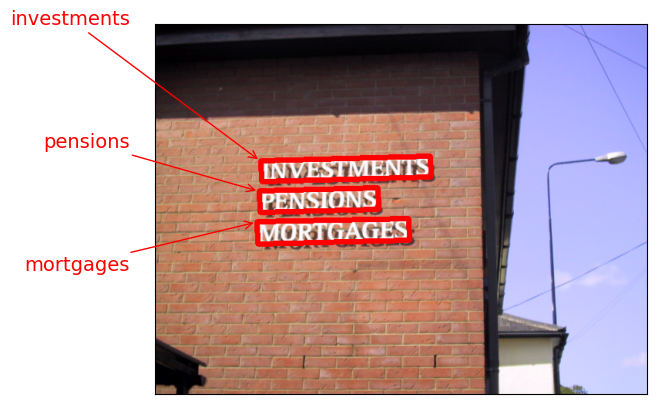

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read('124.jpg')

# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])

#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [ ]:
prediction_groups = [[('investments',
          [[137.44774, 177.4557 ],
           [357.8261 , 171.53154],
           [358.5605 , 198.85051],
           [138.18213, 204.77467]]),
  ('pensions',
   [[135.42407, 216.69124],
          [289.74377, 212.52043],
          [290.49487, 240.31096],
          [136.17517, 244.48177]]),
  ('mortgages',
   [[132.52621, 256.78455],
          [329.8397 , 252.16003],
          [330.5137 , 280.91766],
          [133.20023, 285.54218]])]]

prediction_groups

[[('investments',
   [[137.44774, 177.4557],
    [357.8261, 171.53154],
    [358.5605, 198.85051],
    [138.18213, 204.77467]]),
  ('pensions',
   [[135.42407, 216.69124],
    [289.74377, 212.52043],
    [290.49487, 240.31096],
    [136.17517, 244.48177]]),
  ('mortgages',
   [[132.52621, 256.78455],
    [329.8397, 252.16003],
    [330.5137, 280.91766],
    [133.20023, 285.54218]])]]

In [ ]:
import math
import numpy as np

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

#example of a line mask for the word "Tuesday"
box = prediction_groups[0][1]
x0, y0 = box[1][0]
x1, y1 = box[1][1]
x2, y2 = box[1][2]
x3, y3 = box[1][3]

x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [ ]:
import cv2

mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

#https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

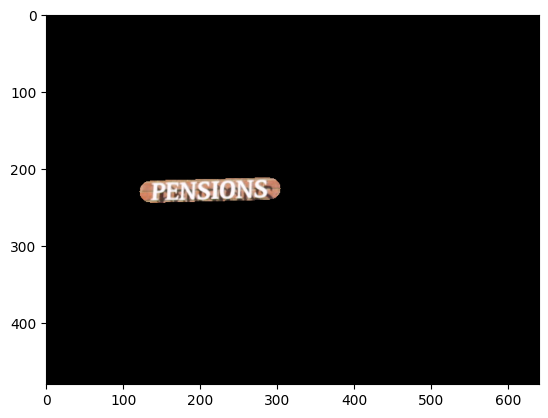

In [ ]:
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

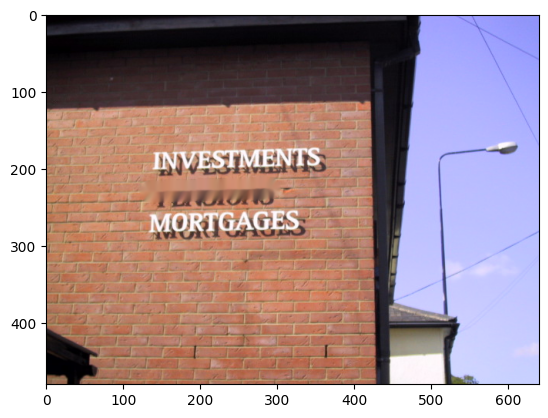

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_photo/py_inpainting/py_inpainting.html
# https://docs.opencv.org/3.4/d7/d8b/group__photo__inpaint.html#gaedd30dfa0214fec4c88138b51d678085

img_inpainted = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)

### **The implementation**

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

pipeline = keras_ocr.pipeline.Pipeline()

def inpaint_text(img_path, pipeline):

    # read image
    img = keras_ocr.tools.read(img_path)

    # generate (word, box) tuples
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")

    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

    return(img)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 1s 723ms/step


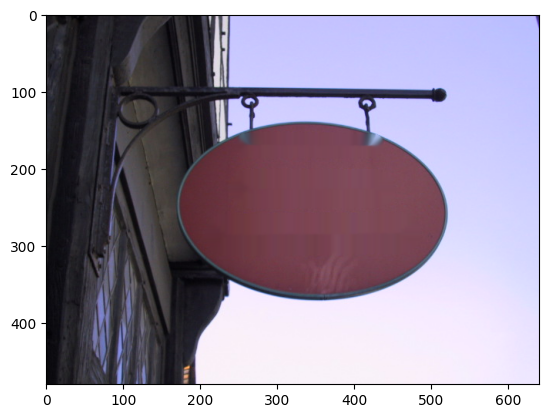

In [ ]:
output_img = inpaint_text('122.jpg', pipeline)
plt.imshow(output_img)

1/1 [==============================] - 3s 3s/step


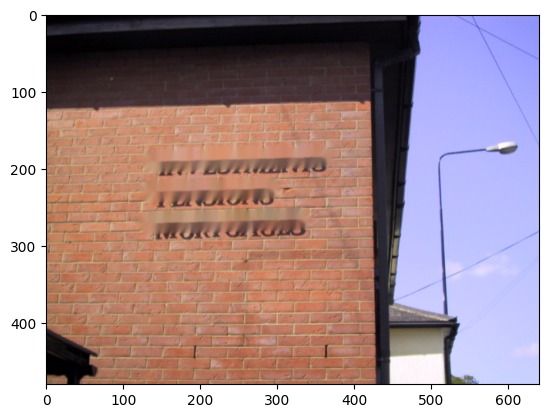

In [ ]:
output_img = inpaint_text('124.jpg', pipeline)
plt.imshow(output_img)

1/1 [==============================] - 1s 772ms/step


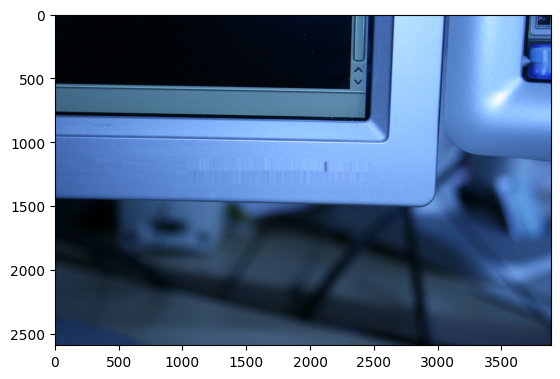

In [ ]:
output_img = inpaint_text('129.jpg', pipeline)
plt.imshow(output_img)

1/1 [==============================] - 3s 3s/step


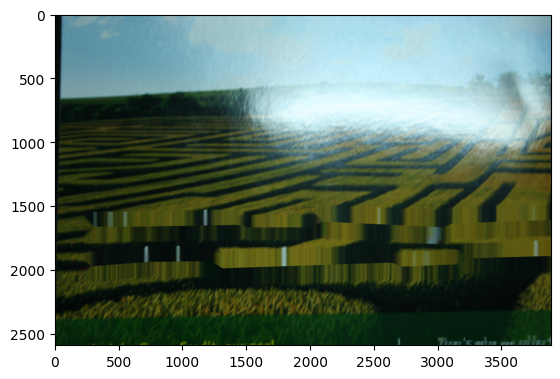

In [ ]:
output_img = inpaint_text('132.jpg', pipeline)
plt.imshow(output_img)

1/1 [==============================] - 1s 1s/step


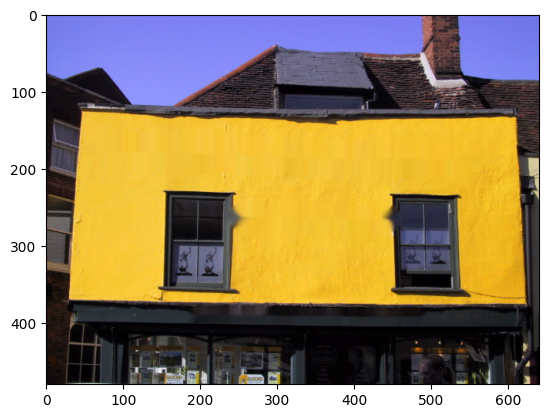

In [ ]:
output_img = inpaint_text('137.jpg', pipeline)
plt.imshow(output_img)

1/1 [==============================] - 0s 269ms/step


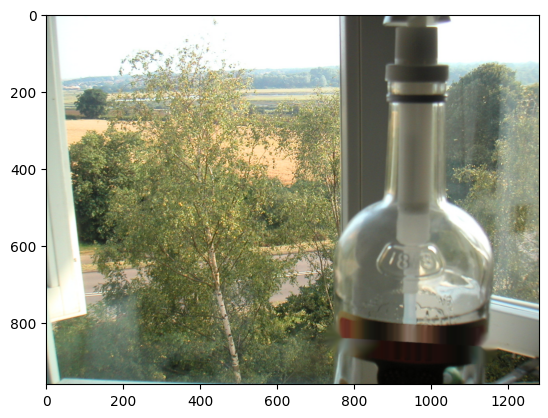

In [ ]:
output_img = inpaint_text('138.jpg', pipeline)
plt.imshow(output_img)

---
#### Object Cleaning

In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

def inpaint_box(img_path, box):

  img = cv2.imread(img_path)

  mask = np.zeros(img.shape[:2], dtype="uint8")

  #https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9
  cv2.rectangle(mask, box[0], box[2], 255, thickness=cv2.FILLED)

  masked = cv2.bitwise_and(img, img, mask=mask)
  display(masked)

  img = cv2.inpaint(img, mask, 7, cv2.INPAINT_TELEA)

  return(img)

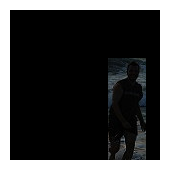

In [ ]:
box_cord = [[98,48], [135,48], [135,150], [98,150]]

output_img = inpaint_box('298.jpg', box_cord)

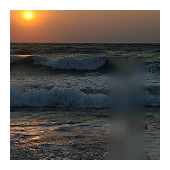

In [ ]:
display(output_img)

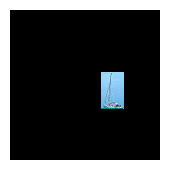

In [ ]:
box_cord = [[91,62], [113,62], [113,98], [91,98]]

output_img = inpaint_box('386.jpg', box_cord)

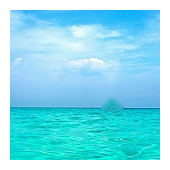

In [ ]:
display(output_img)



---

### 비정형 object cleaning

In [ ]:
def inpaint_box(img_path, box):

  img = cv2.imread(img_path)

  mask = np.zeros(img.shape[:2], dtype="uint8")

  pt1 = np.array(box, np.int32)

  #https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga9bb982be9d641dc51edd5e8ae3624e1f
  cv2.fillConvexPoly(mask, pt1, (255,255,255))

  masked = cv2.bitwise_and(img, img, mask=mask)
  display(masked)

  img = cv2.inpaint(img, mask, 7, cv2.INPAINT_TELEA)

  return(img)

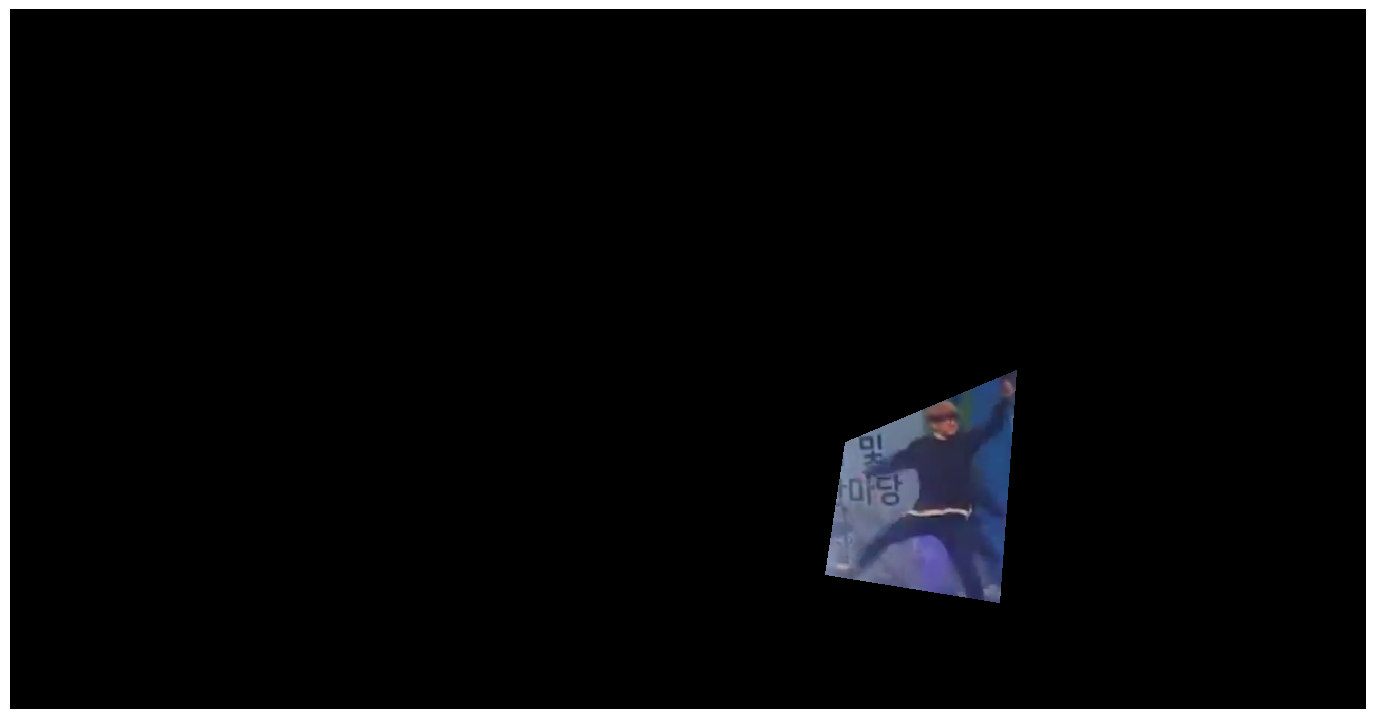

In [ ]:
box_cord = [(835,433), (1006,361), (989,593), (815,565)]

output_img = inpaint_box('image1.png', box_cord)

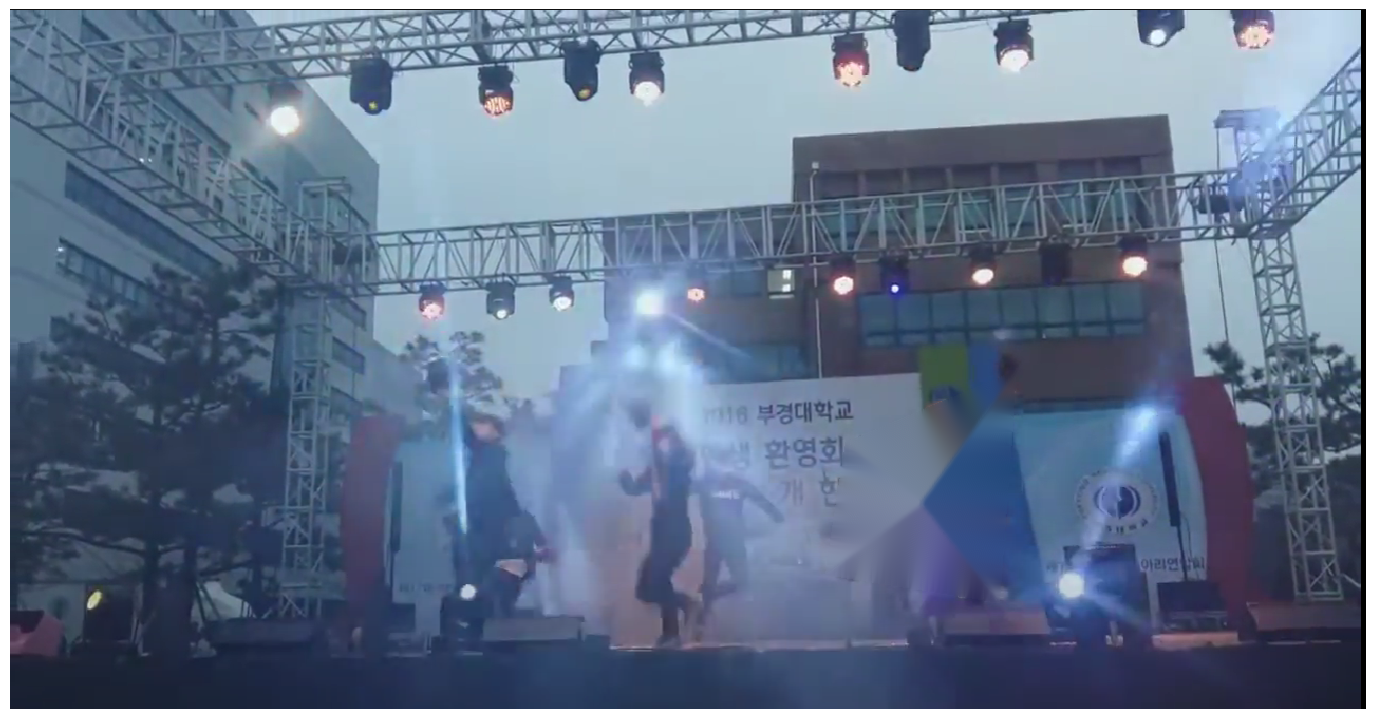

In [ ]:
display(output_img)